<a href="https://colab.research.google.com/github/Akage1234/Handwritten_digit_classification_MNIST_kaggle/blob/main/MNIST_CNN_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing the Data

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Download dataset through kaggle or skip these and upload manually

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c digit-recognizer
!unzip -o digit-recognizer.zip

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 1.18GB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Processing

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(42000, 785)

In [ ]:
X = train.drop("label", axis=1).values
y = train["label"].values

In [ ]:
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [ ]:
X_final_test = test.values.reshape(-1, 28, 28, 1).astype('float32') / 255.0

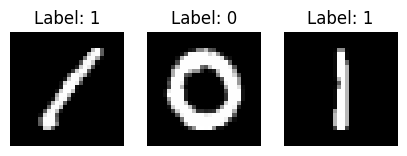

In [ ]:
plt.figure(figsize=(5, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

In [ ]:
X_train, y_train = X[:8000], y[:8000]
X_val, y_val = X[8000:10000], y[8000:10000]

# Comparing models

In [ ]:
# Baseline model (MLP)
base_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28, 1)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
base_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
history = base_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6579 - loss: 1.0918 - val_accuracy: 0.9160 - val_loss: 0.2966
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9117 - loss: 0.3173 - val_accuracy: 0.9345 - val_loss: 0.2176
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9378 - loss: 0.2099 - val_accuracy: 0.9370 - val_loss: 0.1938
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9530 - loss: 0.1580 - val_accuracy: 0.9455 - val_loss: 0.1773
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9601 - loss: 0.1327 - val_accuracy: 0.9485 - val_loss: 0.1718
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0980 - val_accuracy: 0.9550 - val_loss: 0.1531
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0792 - val_accuracy: 0.9520 - val_loss: 0.1563
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9793 - loss: 0.0719 - val_accuracy: 0.

In [ ]:
base_mlp_acc = history.history["val_accuracy"][-1]
print(f"Final Validation Accuracy: {base_mlp_acc:.4f}")

Final Validation Accuracy: 0.9575


In [ ]:
# CNNs - LeNet5
lenet_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=5 ,activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16, kernel_size=5, activation="relu"),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
history = lenet_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6141 - loss: 1.2278 - val_accuracy: 0.8785 - val_loss: 0.3671
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9030 - loss: 0.3163 - val_accuracy: 0.9295 - val_loss: 0.2294
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9387 - loss: 0.1938 - val_accuracy: 0.9465 - val_loss: 0.1760
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9548 - loss: 0.1424 - val_accuracy: 0.9570 - val_loss: 0.1386
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1138 - val_accuracy: 0.9520 - val_loss: 0.1438
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9680 - loss: 0.0985 - val_accuracy: 0.9575 - val_loss: 0.1204
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0735 - val_accuracy: 0.9665 - val_loss: 0.1057
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9794 - loss: 0.0603 - val_accuracy: 0.

In [ ]:
lenet_acc = history.history["val_accuracy"][-1]
print(f"Final Validation Accuracy: {lenet_acc:.4f}")

Final Validation Accuracy: 0.9650


In [ ]:
# VGG-based CNN
vgg_model = tf.keras.Sequential([
    # block 1
    tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", input_shape=(28,28,1), padding="same",),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # block 2
    tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # block 3
    tf.keras.layers.Conv2D(128, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.Conv2D(128, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
vgg_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
history = vgg_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4209 - loss: 1.5643 - val_accuracy: 0.9555 - val_loss: 0.1519
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9336 - loss: 0.2401 - val_accuracy: 0.9725 - val_loss: 0.0996
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9613 - loss: 0.1352 - val_accuracy: 0.9760 - val_loss: 0.0789
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9751 - loss: 0.0912 - val_accuracy: 0.9730 - val_loss: 0.1082
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9746 - loss: 0.0913 - val_accuracy: 0.9825 - val_loss: 0.0563
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9847 - loss: 0.0589 - val_accuracy: 0.9795 - val_loss: 0.0698
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9845 - loss: 0.0626 - val_accuracy: 0.9775 - val_loss: 0.0793
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9826 - loss: 0.0642 - val_accuracy: 0

In [ ]:
vgg_acc = history.history["val_accuracy"][-1]
print(f"Final Validation Accuracy: {vgg_acc:.4f}")

Final Validation Accuracy: 0.9845


In [ ]:
# Deep CNN
deep_model = tf.keras.Sequential([
    # block 1
    tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", input_shape=(28,28,1), padding="same",),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # block 2
    tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # block 3
    tf.keras.layers.Conv2D(128, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.Conv2D(128, kernel_size=3, activation="relu", padding="same",),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
deep_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
history = deep_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4569 - loss: 1.4645 - val_accuracy: 0.9625 - val_loss: 0.1544
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9449 - loss: 0.1685 - val_accuracy: 0.9765 - val_loss: 0.0714
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9666 - loss: 0.1108 - val_accuracy: 0.9775 - val_loss: 0.0722
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9762 - loss: 0.0827 - val_accuracy: 0.9770 - val_loss: 0.0771
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9834 - loss: 0.0612 - val_accuracy: 0.9850 - val_loss: 0.0539
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9848 - loss: 0.0568 - val_accuracy: 0.9790 - val_loss: 0.0600
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9841 - loss: 0.0515 - val_accuracy: 0.9865 - val_loss: 0.0496
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9864 - loss: 0.0462 - val_accuracy: 0.9845 - val

In [ ]:
deep_acc = history.history["val_accuracy"][-1]
print(f"Final Validation Accuracy: {deep_acc:.4f}")

Final Validation Accuracy: 0.9780


In [ ]:
def residual_block(x, filters, kernel_size=3):
    skip = x
    x = tf.keras.layers.Conv2D(filters, kernel_size, padding="same", activation="relu")(x)
    x = tf.keras.layers.Conv2D(filters, kernel_size, padding="same")(x)
    if skip.shape[-1] != filters:
        skip = tf.keras.layers.Conv2D(filters, 1, padding="same")(skip)
    x = tf.keras.layers.Add()([x, skip])
    x = tf.keras.layers.Activation("relu")(x)
    return x

inputs = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)

# block 1
x = residual_block(x, 32)
x = residual_block(x, 32)
x = tf.keras.layers.MaxPooling2D()(x)

# block 2
x = residual_block(x, 64)
x = residual_block(x, 64)
x = tf.keras.layers.MaxPooling2D()(x)

# block 3
x = residual_block(x, 128)
x = residual_block(x, 128)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

In [ ]:
resnet_model = tf.keras.Model(inputs=inputs, outputs = outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
resnet_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
history = resnet_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.4496 - loss: 1.6477 - val_accuracy: 0.9125 - val_loss: 1.1525
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9575 - loss: 0.1409 - val_accuracy: 0.9635 - val_loss: 0.1767
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9743 - loss: 0.0828 - val_accuracy: 0.9660 - val_loss: 0.1142
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9837 - loss: 0.0536 - val_accuracy: 0.9795 - val_loss: 0.0662
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9887 - loss: 0.0394 - val_accuracy: 0.9755 - val_loss: 0.0806
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9897 - loss: 0.0312 - val_accuracy: 0.9755 - val_loss: 0.0767
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9907 - loss: 0.0291 - val_accuracy: 0.9765 - val_loss: 0.1020
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9949 - loss: 0.0195 - val_acc

In [ ]:
resnet_acc = history.history["val_accuracy"][-1]
print(f"Final Validation Accuracy: {resnet_acc:.4f}")

Final Validation Accuracy: 0.9855


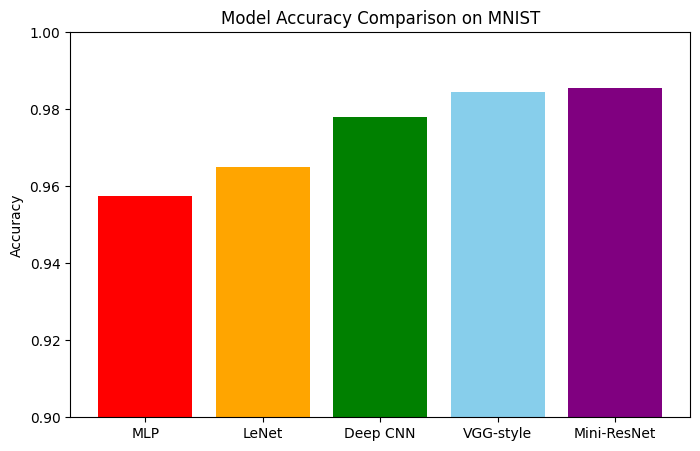

In [ ]:
import matplotlib.pyplot as plt

accuracies = [base_mlp_acc, lenet_acc, deep_acc, vgg_acc, resnet_acc]
models = ['MLP','LeNet', 'Deep CNN', 'VGG-style', 'Mini-ResNet']
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['red','orange','green','skyblue','purple'])
plt.ylim(0.9, 1)  # accuracy from 0 to 1
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison on MNIST")
plt.show()

# Training

In [ ]:
from sklearn.model_selection import train_test_split
X_full = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

In [ ]:
def residual_block(x, filters, kernel_size=3):
    skip = x
    x = tf.keras.layers.Conv2D(filters, kernel_size, padding="same", activation="relu")(x)
    x = tf.keras.layers.Conv2D(filters, kernel_size, padding="same")(x)
    if skip.shape[-1] != filters:
        skip = tf.keras.layers.Conv2D(filters, 1, padding="same")(skip)
    x = tf.keras.layers.Add()([x, skip])
    x = tf.keras.layers.Activation("relu")(x)
    return x

inputs = tf.keras.Input(shape=(28,28,1))
x = data_augmentation(inputs, training=True)
x = tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)

# block 1
x = residual_block(x, 32)
x = residual_block(x, 32)
x = tf.keras.layers.MaxPooling2D()(x)

# block 2
x = residual_block(x, 64)
x = residual_block(x, 64)
x = tf.keras.layers.MaxPooling2D()(x)

# block 3
x = residual_block(x, 128)
x = residual_block(x, 128)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

early_stopping = tf.keras.callbacks.EarlyStopping( monitor='val_accuracy', patience=8,restore_best_weights=True,  mode='max')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

resnet_model = tf.keras.Model(inputs=inputs, outputs = outputs)
resnet_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
resnet_history = resnet_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[early_stopping])

Epoch 1/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7948 - loss: 0.6005 - val_accuracy: 0.9802 - val_loss: 0.0566
Epoch 2/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9852 - loss: 0.0515 - val_accuracy: 0.9707 - val_loss: 0.0896
Epoch 3/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.9864 - val_loss: 0.0498
Epoch 4/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9897 - loss: 0.0313 - val_accuracy: 0.9840 - val_loss: 0.0584
Epoch 5/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9930 - loss: 0.0234 - val_accuracy: 0.9893 - val_loss: 0.0326
Epoch 6/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9913 - loss: 0.0297 - val_accuracy: 0.9912 - val_loss: 0.0353
Epoch 7/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9931 - val_loss: 0.0261
Epoch 8/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9962 - los

In [ ]:
y_pred = resnet_model.predict(X_final_test)
pred_labels = np.argmax(y_pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(pred_labels)+1),
    "Label": pred_labels
})
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message"